In [48]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [49]:
df = pd.read_csv('NCAA_data.csv')
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,kenyon-martin-1,Kenyon Martin,Player,cincinnati,142,292,0.587,0.586,0.494,0.581,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,aj-guyton-1,A.J. Guyton,Player,indiana,403,52,0.541,0.455,0.249,0.790,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,jake-voskuhl-1,Jake Voskuhl,Player,uconn,124,193,0.542,0.542,0.555,0.656,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,mike-smith-1,Mike Smith,Bust,louisiana monroe,147,42,0.507,0.428,0.357,0.769,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [50]:
# fig, ax = plt.subplots(figsize=(10,6))
# sns.heatmap(df.corr(), center=0, cmap="Blues")
# ax.set_title("NCAA Player Stats")

# fig, ax = plt.subplots(figsize=(10,6))
# sns.heatmap(df.corr(), center=0, cmap="BrBG", annot=True)

In [64]:
corr_1 = df.drop(['class',"player_id","name","college", 'field_goal_percentage', 'free_throw_attempt_rate', 'free_throw_percentage', 'games_played',
                       'minutes_played','win_shares_per_40_minutes', 'points_per_40','steals_per_40',
                       'total_rebounds_per_40','turnovers_per_40'], axis=1)
corr.head()

,assists,blocks,effective_field_goal_percentage,height,points,steals,three_point_percentage,three_pointers,total_rebounds,true_shooting_percentage,turnover_percentage,turnovers,assists_per_40,blocks_per_40,three_pointers_per_40,Code
0,142,292,0.587,81,1279,124,0.222000,2.0,869,0.592,14.3,139.0,2.781587,5.719882,0.039177,1
1,403,52,0.541,73,2100,129,0.414000,283.0,429,0.572,13.6,218.0,4.944785,0.638037,3.472393,1
2,124,193,0.542,83,863,86,0.329163,0.0,880,0.573,23.0,160.0,2.271062,3.534799,0.000000,1
3,479,10,0.486,70,1650,186,0.355000,195.0,319,0.527,15.6,188.0,8.915775,0.186133,3.629595,0
4,147,42,0.507,80,1062,90,0.318000,130.0,449,0.551,20.0,241.0,3.034056,0.866873,2.683179,0


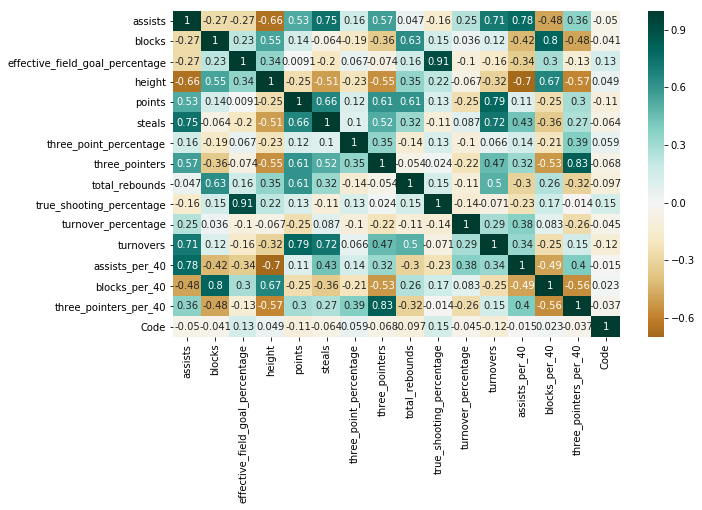

In [65]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_1.corr(), center=0, cmap="BrBG", annot=True)

In [69]:
corr_2 = df.drop(["class","player_id","name","college",'true_shooting_percentage','assists_per_40',
            'turnovers','points','blocks_per_40','effective_field_goal_percentage','turnover_percentage',
            'blocks','three_point_percentage','steals','assists','three_pointers_per_40','three_pointers',
            'height','total_rebounds'], axis=1)
feature_names = X.columns
corr_2.head()

,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,games_played,minutes_played,win_shares_per_40_minutes,points_per_40,steals_per_40,total_rebounds_per_40,turnovers_per_40,Code
0,0.586,0.494,0.581,116,2042.0,0.346,25.053869,2.428991,17.022527,2.722821,1
1,0.455,0.249,0.790,128,3260.0,0.145,25.766871,1.582822,5.263804,2.674847,1
2,0.542,0.555,0.656,138,2184.0,0.237,15.805861,1.575092,16.117216,2.930403,1
3,0.416,0.257,0.822,108,2149.0,0.158,30.711959,3.462075,5.937645,3.499302,0
4,0.428,0.357,0.769,55,1938.0,0.165,21.919505,1.857585,9.267286,4.974200,0


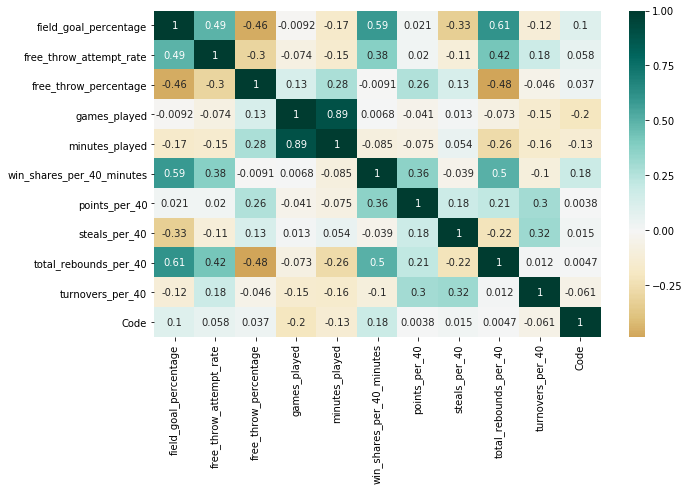

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_2.corr(), center=0, cmap="BrBG", annot=True)

In [67]:
y = df["class"]

In [84]:
X = df.drop(["class","player_id","name","college",'assists_per_40',
            'turnovers','points','blocks_per_40','turnover_percentage',
            'blocks','steals','assists','three_pointers_per_40','three_pointers',
            'total_rebounds', 'free_throw_percentage', 
             'games_played','minutes_played', 'points_per_40','steals_per_40',
            'total_rebounds_per_40','turnovers_per_40', "Code"], axis=1)

# field_goal_percentage, win_shares_per_40_minutes, effective_field_goal_percentage, 
# true_shooting_percentage, free_throw_attempt_rate, three_point_percentage, height

feature_names = X.columns
X.head()

,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,height,three_point_percentage,true_shooting_percentage,win_shares_per_40_minutes
0,0.587,0.586,0.494,81,0.222000,0.592,0.346
1,0.541,0.455,0.249,73,0.414000,0.572,0.145
2,0.542,0.542,0.555,83,0.329163,0.573,0.237
3,0.486,0.416,0.257,70,0.355000,0.527,0.158
4,0.507,0.428,0.357,80,0.318000,0.551,0.165


In [85]:
from sklearn.preprocessing import LabelEncoder
y = df["class"]
labels = LabelEncoder()
labels.fit(y)
encoded_y = labels.transform(y)

In [86]:
labels_df = pd.DataFrame({"class": y, "code": encoded_y}).drop_duplicates(subset=None, keep="first")
labels_df

,class,code
0,Player,1
3,Bust,0


In [87]:
en_y = encoded_y
df["Code"]=en_y
df

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40,Code
0,kenyon-martin-1,Kenyon Martin,Player,cincinnati,142,292,0.587,0.586,0.494,0.581,...,139.00000,0.346000,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821,1
1,aj-guyton-1,A.J. Guyton,Player,indiana,403,52,0.541,0.455,0.249,0.790,...,218.00000,0.145000,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847,1
2,jake-voskuhl-1,Jake Voskuhl,Player,uconn,124,193,0.542,0.542,0.555,0.656,...,160.00000,0.237000,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403,1
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,188.00000,0.158000,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302,0
4,mike-smith-1,Mike Smith,Bust,louisiana monroe,147,42,0.507,0.428,0.357,0.769,...,241.00000,0.165000,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200,0
5,eddie-house-1,Eddie House,Player,arizona state,405,19,0.495,0.425,0.187,0.798,...,195.00000,0.113000,3.916828,0.183752,19.767892,2.495164,2.417795,4.854932,1.885880,1
6,eduardo-najera-1,Eduardo Najera,Player,oklahoma,215,89,0.460,0.430,0.354,0.669,...,201.00000,0.183000,2.865711,1.186271,21.939354,2.572476,1.132956,12.129290,2.679107,1
7,lavor-postell-1,Lavor Postell,Player,st johns ny,205,58,0.470,0.430,0.383,0.789,...,172.00000,0.115000,2.882250,0.815466,20.063269,1.813708,1.293497,10.066784,2.418278,1
8,hanno-mottola-1,Hanno Mottola,Bust,utah,139,50,0.533,0.500,0.415,0.774,...,159.00000,0.207000,2.571693,0.925069,27.604070,0.684551,1.313599,10.194265,2.941721,0
9,chris-carrawell-1,Chris Carrawell,Bust,duke,309,114,0.514,0.486,0.415,0.667,...,177.27896,0.181716,3.018494,1.357832,18.738180,1.505259,1.288549,8.322600,2.901975,0


In [88]:
encoded_y =encoded_y.reshape(-1, 1)

In [89]:
print(X.shape)
print(y.shape)

(853, 7)
(853,)


In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [91]:
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
# y_scaler = MinMaxScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [92]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

/Users/melissamason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6682242990654206

In [93]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf.feature_importances_
importances

array([0.14461251, 0.1605518 , 0.1482201 , 0.08918798, 0.14561535,
       0.14600378, 0.16580848])

In [94]:
# We can sort the features by their importance
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.16580847692208503, 'win_shares_per_40_minutes'),
 (0.16055179911553846, 'field_goal_percentage'),
 (0.14822009718308357, 'free_throw_attempt_rate'),
 (0.14600378348246348, 'true_shooting_percentage'),
 (0.14561534670378434, 'three_point_percentage'),
 (0.14461251195311148, 'effective_field_goal_percentage'),
 (0.08918798463993387, 'height')]

In [95]:
# Create the SVC Model
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [96]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [97]:
# Fit the model using the grid search estimator. 
grid.fit(X_train, y_train)

/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7429906542056075, total=   0.1s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7464788732394366, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...... C=1, gamma=0.0001, score=0.7452830188679245, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7429906542056075, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7464788732394366, total=   0.0s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ...... C=1, gamma=0.0005, score=0.7452830188679245, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1

/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV] ...... C=5, gamma=0.0001, score=0.7464788732394366, total=   0.0s
[CV] C=5, gamma=0.0001 ...............................................
[CV] ...... C=5, gamma=0.0001, score=0.7452830188679245, total=   0.1s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.7429906542056075, total=   0.1s
[CV] C=5, gamma=0.0005 ...............................................
[CV] ...... C=5, gamma=0.0005, score=0.7464788732394366, total=   0.0s
[CV] C=5, gamma=0.0005 ...............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV] ...... C=5, gamma=0.0005, score=0.7452830188679245, total=   0.1s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7429906542056075, total=   0.1s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7464788732394366, total=   0.0s
[CV] C=5, gamma=0.001 ................................................
[CV] ....... C=5, gamma=0.001, score=0.7452830188679245, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array w

[CV] ..... C=10, gamma=0.0001, score=0.7429906542056075, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.7464788732394366, total=   0.1s
[CV] C=10, gamma=0.0001 ..............................................
[CV] ..... C=10, gamma=0.0001, score=0.7452830188679245, total=   0.1s
[CV] C=10, gamma=0.0005 ..............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0005, score=0.7429906542056075, total=   0.1s
[CV] C=10, gamma=0.0005 ..............................................
[CV] ..... C=10, gamma=0.0005, score=0.7464788732394366, total=   0.1s
[CV] C=10, gamma=0.0005 ..............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=10, gamma=0.0005, score=0.7452830188679245, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.7429906542056075, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=10, gamma=0.001, score=0.7464788732394366, total=   0.1s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.7452830188679245, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=50, gamma=0.0001, score=0.7429906542056075, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] ..... C=50, gamma=0.0001, score=0.7464788732394366, total=   0.1s
[CV] C=50, gamma=0.0001 ..............................................
[CV] ..... C=50, gamma=0.0001, score=0.7452830188679245, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..... C=50, gamma=0.0005, score=0.7429906542056075, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ..... C=50, gamma=0.0005, score=0.7464788732394366, total=   0.1s
[CV] C=50, gamma=0.0005 ..............................................
[CV] ..... C=50, gamma=0.0005, score=0.7452830188679245, total=   0.1s
[CV] C=50, gamma=0.001 ...............................................


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ...... C=50, gamma=0.001, score=0.7429906542056075, total=   0.1s
[CV] C=50, gamma=0.001 ...............................................
[CV] ...... C=50, gamma=0.001, score=0.7464788732394366, total=   0.1s
[CV] C=50, gamma=0.001 ...............................................
[CV] ...... C=50, gamma=0.001, score=0.7452830188679245, total=   0.1s


/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    2.9s finished
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [98]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [99]:
# List the best score
print(grid.best_score_)

0.7449139280125195


In [100]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [101]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        73
           1       0.66      1.00      0.79       141

   micro avg       0.66      0.66      0.66       214
   macro avg       0.33      0.50      0.40       214
weighted avg       0.43      0.66      0.52       214



/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/melissamason/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
